# Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.style.use('ggplot')

In [4]:
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=['user_id', 'age', 'sex', 'occupation'],usecols=range(4))
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating'],usecols=range(3))
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=['movie_id', 'title', 'release_date'], usecols=range(3),encoding='latin-1')
movielens = pd.merge(pd.merge(movies, ratings), users)

,movie_id,title,release_date,user_id,rating,age,sex,occupation
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired
5,9,Dead Man Walking (1995),01-Jan-1995,308,4,60,M,retired
6,11,Seven (Se7en) (1995),01-Jan-1995,308,5,60,M,retired
7,12,"Usual Suspects, The (1995)",14-Aug-1995,308,5,60,M,retired
8,15,Mr. Holland's Opus (1995),29-Jan-1996,308,3,60,M,retired
9,17,From Dusk Till Dawn (1996),05-Feb-1996,308,4,60,M,retired


# Rating Variation Analysis

## I. Which movies are the most divisive among different ages?

### A. Find out how ages are distributed among the users

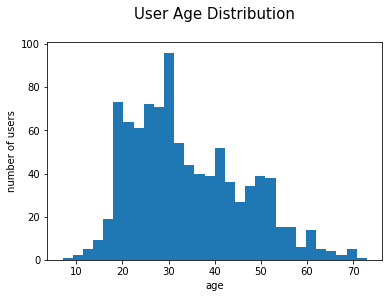

In [11]:
ax = users.age.plot.hist(bins=30)
ax.set_title('User Age Distribution\n',fontsize=15)
plt.ylabel('number of users')
plt.xlabel('age')
plt.show()
fig=ax.get_figure()
fig.savefig('../pics/0201UserAgeDistribution.png', dpi=100)

#### As shown in the histogram above, the age range is 0 - 80. And most of the users are between age 20 - 40.

### B. Find out how ratings differ among age groups

In [19]:
#Split the users into 4 bins of 20 years
age_groups = ['Adolescence(<19)', 'Early Adulthood(20-39)', 'Mature Adulthood(40-59)', 'Late Adulthood(>60)']
movielens['age_group'] = pd.cut(movielens.age, range(0, 81, 20), right=False, labels=age_groups)
movielens.head()

,movie_id,title,release_date,user_id,rating,age,sex,occupation,age_group
0,1,Toy Story (1995),01-Jan-1995,308,4,60,M,retired,Late Adulthood(>60)
1,4,Get Shorty (1995),01-Jan-1995,308,5,60,M,retired,Late Adulthood(>60)
2,5,Copycat (1995),01-Jan-1995,308,4,60,M,retired,Late Adulthood(>60)
3,7,Twelve Monkeys (1995),01-Jan-1995,308,4,60,M,retired,Late Adulthood(>60)
4,8,Babe (1995),01-Jan-1995,308,5,60,M,retired,Late Adulthood(>60)


In [20]:
age_groups = movielens.groupby('age_group').agg({'rating': {'ratings count':np.size, 'avg. ratings':np.mean}})
age_groups.columns = age_groups.columns.droplevel(0)
age_groups

,avg. ratings,ratings count
age_group,,
Adolescence(<19),3.487597,8224
Early Adulthood(20-39),3.501648,65231
Mature Adulthood(40-59),3.607924,23725
Late Adulthood(>60),3.648936,2820


#### As shown in the table above, the lowest rating comes from the group A(0-19) and the highest D(60-79). So we can reckon the youngest and the oldest have the most divisive opinions.

### C. Find out how ratings of popular(100 most rated) movies differ among age groups

In [21]:
movies_mostRated100 = movielens.groupby('movie_id').size().sort_values(ascending=False)[:100]
movielens.set_index('movie_id', inplace=True)
divisive_byAge = movielens.loc[movies_mostRated100.index].groupby(['title', 'age_group'])
divisive_byAge = divisive_byAge.rating.mean().unstack(1).fillna(0)

In [23]:
diff_byAge = pd.DataFrame()
diff_byAge['Adolescence(<19)'] = divisive_byAge['Adolescence(<19)']
diff_byAge['Early Adulthood(20-39)'] = divisive_byAge['Early Adulthood(20-39)']
diff_byAge['Mature Adulthood(40-59)'] = divisive_byAge['Mature Adulthood(40-59)']
diff_byAge['Late Adulthood(>60)'] = divisive_byAge['Late Adulthood(>60)']
diff_byAge['Diff'] = divisive_byAge['Adolescence(<19)']-divisive_byAge['Late Adulthood(>60)']
diff_byAge.head()

,Adolescence(<19),Early Adulthood(20-39),Mature Adulthood(40-59),Late Adulthood(>60),Diff
title,,,,,
2001: A Space Odyssey (1968),4.181818,3.907514,4.058824,4.285714,-0.103896
Air Force One (1997),3.647059,3.628458,3.627907,3.666667,-0.019608
Aladdin (1992),3.840000,3.830189,3.727273,3.500000,0.340000
Alien (1979),4.111111,4.059406,3.984375,3.571429,0.539683
Aliens (1986),4.050000,4.000000,3.745455,3.666667,0.383333


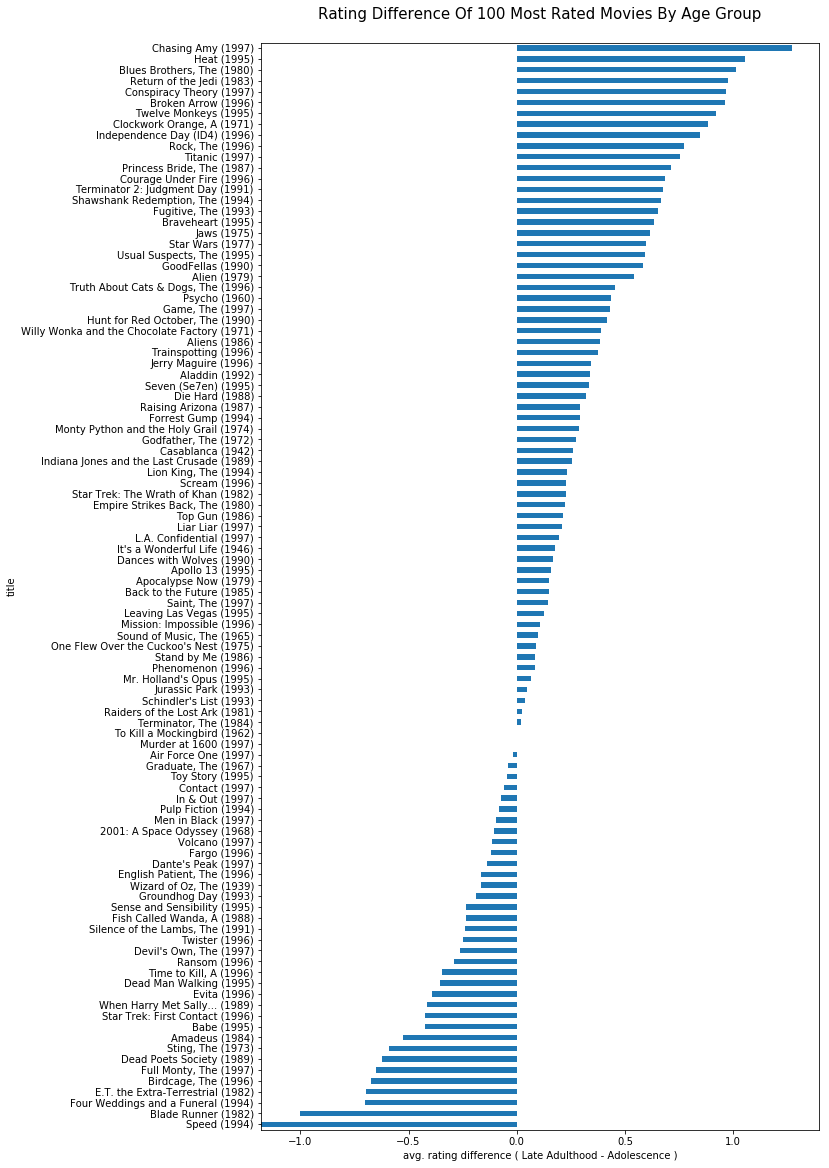

In [26]:
group_diff = diff_byAge['Diff']
ax = group_diff.sort_values().plot(kind='barh', figsize=[10, 20])
ax.set_title('Rating Difference Of 100 Most Rated Movies By Age Group\n',fontsize=15)
plt.ylabel('title')
plt.xlabel('avg. rating difference ( Late Adulthood - Adolescence )');
plt.show()
fig = ax.get_figure()
fig.savefig('../pics/0202RatingDifferenceByAgeGroup.png', dpi=100)

#### As shown in the graph above, the most divisive movies are the ones with the biggest differences. 
#### Among the 100 most rated movies, Chasing Amy is specially prefered by people older than 60, Speed is specially prefered by people under 20.

## II. Which movies are the most divisive among different genders?

### A. Find out the avg. rating difference of each movie (rating from females - rating from males)

In [28]:
movielens.reset_index('movie_id', inplace=True)
divisive_byGender = movielens.pivot_table(index=['movie_id', 'title'], columns=['sex'], values='rating', fill_value=0)
divisive_byGender['Diff (F-M)'] = divisive_byGender.F - divisive_byGender.M
divisive_byGender.head()

,sex,F,M,Diff (F-M)
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,-0.119994
2,GoldenEye (1995),3.368421,3.178571,0.189850
3,Four Rooms (1995),2.687500,3.108108,-0.420608
4,Get Shorty (1995),3.400000,3.591463,-0.191463
5,Copycat (1995),3.772727,3.140625,0.632102


### B. Find out how ratings of popular(100 most rated) movies differ according to genders

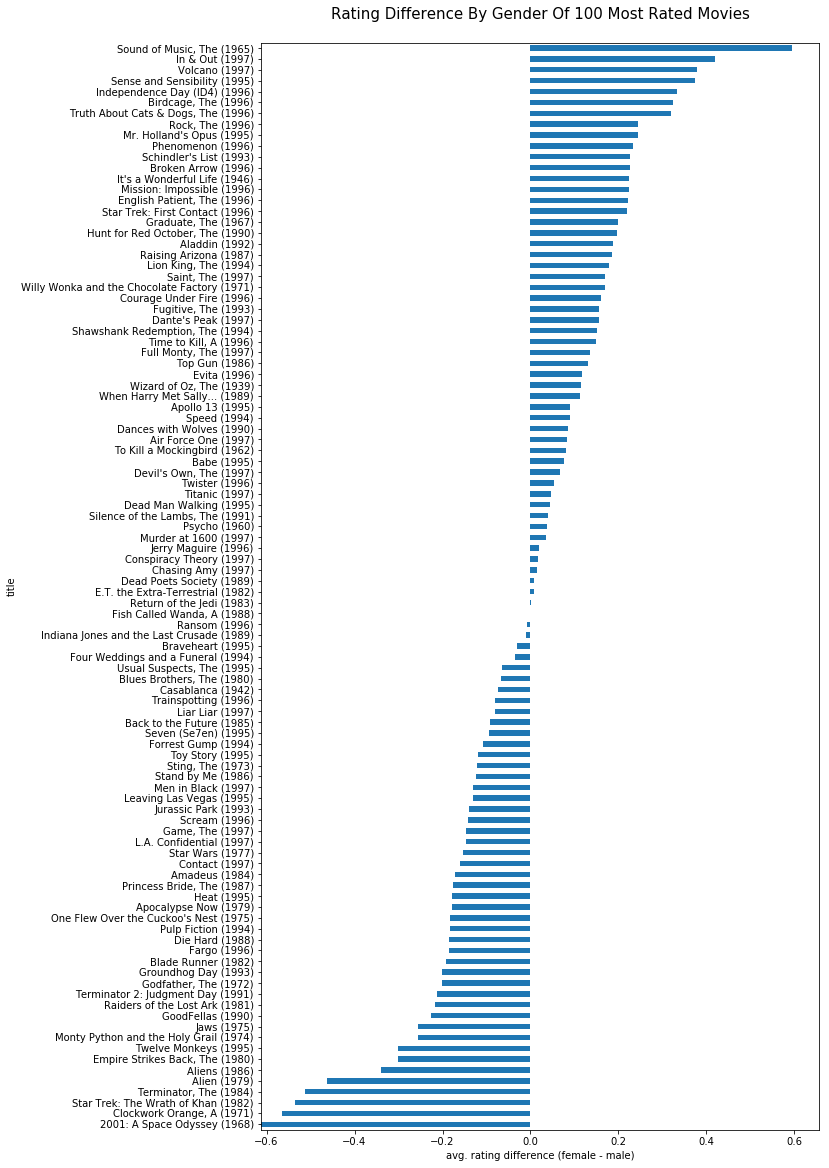

In [29]:
divisive_byGender.reset_index('movie_id', inplace=True)
diff_byGender = divisive_byGender[divisive_byGender.movie_id.isin(movies_mostRated100.index)]['Diff (F-M)']
ax = diff_byGender.sort_values().plot(kind='barh', figsize=[10, 20])
ax.set_title('Rating Difference By Gender Of 100 Most Rated Movies\n',fontsize=15)
plt.ylabel('title')
plt.xlabel('avg. rating difference (female - male)');
plt.show()
fig = ax.get_figure()
fig.savefig('../pics/0203RatingDifferenceByGender.png', dpi=100)

#### The differences in rating by gender are less notable than by age group.
#### Among the 100 most rated movies, Sound Of Musice is particularly prefered by females, 2001 A Space Odyssey is particularly prefered by males.